## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (Sezin, Yavuz, 2200356050\)

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

In [1]:
## Import necessary libraries
!pip install ucimlrepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
# Features and target variables
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [3]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

X_numpy = np.array(X) # Convert features data to a numpy array
y_numpy = np.array(y) # Convert target variable data to a numpy array

print(X_numpy)
print(y_numpy)


[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [4]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

shape_X = X_numpy.shape # Number of raws and columns of features.
print("Size of features array X:" , shape_X)
shape_y = y_numpy.shape # Number of raws and columns of targets.
print("Size of targets array y:" , shape_y)



# Check the data type of elements within the array.
type_X = type(X_numpy)
print("Type of features array X:" , type_X)
type_y = type(y_numpy)
print("Type of targets array y:" , type_y)

print("Feature names:", X.columns.to_list) # Feature names
print("Target names:", y.columns.to_list) # Target names



# Summary statistics
print("\nSummary statistics:")
# Mean, median, standard deviation, minimum, and maximum for each feature (X_numpy)
print("Mean of each feature:", np.mean(X_numpy, axis=0))
print("Median of each feature:", np.median(X_numpy, axis=0))
print("Standard deviation of each feature:", np.std(X_numpy, axis=0))
print("Minimum of each feature:", np.min(X_numpy, axis=0))
print("Maximum of each feature:", np.max(X_numpy, axis=0))

# For the target variable (y_numpy)
print("Mean of target variable:", np.mean(y_numpy))
print("Standard deviation of target variable:", np.std(y_numpy))
print("Min and max of target variable:", np.min(y_numpy), np.max(y_numpy))

# Checking for missing values
missing_features = np.isnan(X_numpy).sum()
missing_target = np.isnan(y_numpy).sum()
print("\nNumber of missing values in features:", missing_features)
print("Number of missing values in target:", missing_target)

Size of features array X: (1372, 4)
Size of targets array y: (1372, 1)
Type of features array X: <class 'numpy.ndarray'>
Type of targets array y: <class 'numpy.ndarray'>
Feature names: <bound method IndexOpsMixin.tolist of Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')>
Target names: <bound method IndexOpsMixin.tolist of Index(['class'], dtype='object')>

Summary statistics:
Mean of each feature: [ 0.43373526  1.92235312  1.39762712 -1.19165652]
Median of each feature: [ 0.49618  2.31965  0.61663 -0.58665]
Standard deviation of each feature: [2.84172641 5.86690749 4.30845909 2.10024732]
Minimum of each feature: [ -7.0421 -13.7731  -5.2861  -8.5482]
Maximum of each feature: [ 6.8248 12.9516 17.9274  2.4495]
Mean of target variable: 0.4446064139941691
Standard deviation of target variable: 0.49692207701954094
Min and max of target variable: 0 1

Number of missing values in features: 0
Number of missing values in target: 0


### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

In the project, scaling the data is crucial because the Perceptron Learning Algorithm, like many machine learning algorithms, is sensitive to the scale of its features. This sensitivity arises because the algorithm uses calculations that are impacted by the relative magnitude of each feature. If one feature has a much larger range or standard deviation than another, it can disproportionately influence the algorithm's weight updates, leading the model to prioritize that feature over others.

In my dataset, each feature—variance, skewness, kurtosis, and entropy—has a different range and standard deviation, suggesting that scaling is necessary to bring all features onto a similar scale. Models that rely on distance metrics or gradient-based optimization, like the Perceptron, perform more accurately and efficiently when the input features are scaled. This ensures that each feature has a comparable influence on the model, allowing for balanced weight updates and a more accurate decision boundary.

The variation in range and spread among the features, standardization (scaling each feature to have a mean of 0 and a standard deviation of 1) is the appropriate scaling technique. This will ensure that each feature contributes equally to the model’s learning process and helps the Perceptron algorithm effectively distinguish between the two classes, authentic and fake, in the Banknote Authentication Dataset.Since the targets are binary, scaling is not needed for the target labels.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [5]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.


#The data statistics before scaling
print("Original Features Array (X_numpy):\n", X_numpy)
print("Mean of each feature before scaling:", np.mean(X_numpy, axis=0))
print("Standard deviation of each feature before scaling:", np.std(X_numpy, axis=0))
print("Minimum of each feature before scaling:", np.min(X_numpy, axis=0))
print("Maximum of each feature before scaling:", np.max(X_numpy, axis=0))

# Scaling
scaler = StandardScaler()

# Fit and transform the features array
X_scaled = scaler.fit_transform(X_numpy)

#After scaling
print("\nScaled Features Array (X_scaled):\n", X_scaled)
print("Mean of each feature after scaling:", X_scaled.mean(axis=0))  #approximately 0
print("Standard deviation of each feature after scaling:", X_scaled.std(axis=0))  #approximately 1)
print("Minimum of each feature after scaling:", X_scaled.min(axis=0))
print("Maximum of each feature after scaling:", X_scaled.max(axis=0))



Original Features Array (X_numpy):
 [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
Mean of each feature before scaling: [ 0.43373526  1.92235312  1.39762712 -1.19165652]
Standard deviation of each feature before scaling: [2.84172641 5.86690749 4.30845909 2.10024732]
Minimum of each feature before scaling: [ -7.0421 -13.7731  -5.2861  -8.5482]
Maximum of each feature before scaling: [ 6.8248 12.9516 17.9274  2.4495]

Scaled Features Array (X_scaled):
 [[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]
Mean of each fea

#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.
2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

Answer1:In general, training a machine learning model aims to obtain one that can recognize general patterns of data, rather than memorizing the particular examples that have been used to train it. Since we might evaluate our model only on training data, we would get very optimistic results because it has seen this data before and adapted itself to fit in as tightly as possible. The problem which often arises, which is extremely common in practice, is overfitting: when a model is really fit to the training data but then generalizes terribly when executed on new, unseen data. If we use a validation set-a separate, independent subset of data that the model hasn't seen during training-we will get a much better approximation of how well the model does in a production environment. The validation set plays the role of new data and can help indicate whether the model has generalized well beyond the specific patterns present in the training data. This ensures that our estimate of the performance of the model is unbiased and therefore a better guide for how well the model is likely to work in practice.

Answer2: It is important to evaluate a model on unseen data, as it is going to determine how well it can generalize, or apply the knowledge it learned to new, unknown data points. The ultimate goal in machine learning is to be able to build models that perform well on real-world occurrences and not on the data they are being trained with. Then, we use a model with a validation set including data that the model has never seen, simulating how it would behave when faced with new real-world fresh data. This helps to estimate generalization capability. If the model performance is similar for both training and validation sets, it probably learned general patterns and was less likely to fail with other datasets. If it performs poorly on the validation set, that will hint that it might perform badly on out-of-sample data, and that would include some tuning or adjustment to avoid overfitting. This step is important to ensure that effective models are generated which will be reliable and maintain accuracy across a wide range of circumstances.

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)

# Flatten y_numpy to ensure it's one-dimensional
y_numpy = y_numpy.flatten()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numpy, test_size=0.2, random_state=50)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097,)
Shape of Y_test: (275,)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.

Answer:
This type of data applies the Perceptron learning algorithm because it is well-suited for binary classification tasks where we are searching for a separating hyperplane that will help to linearly distinguish between two classes. The dataset consists of two classes in this problem, such as authentic versus fake banknotes, and we want to tell them apart based on their features. The Perceptron algorithm runs an iterative adjustment of weights in search of a hyperplane or a line which best classifies these two classes in a 2D space. Every misclassified data point helps the model fine-tune its weights to perfection; hence, it is a favorable choice for linearly separable or almost separable data.
Another reason for applying the algorithm here is its simplicity. Perceptron is rather computationally undemanding and can converge fast in the case of linearly separable data, especially when the learning rate is well-chosen. This allows it to be practical for real-world classification tasks on datasets of small to medium size. Besides, as the update rule directly depends on the error in the prediction made by the Perceptron, it learns from the toughest data points for each of the classes, making it robust when every feature is crucial for classification.


In [7]:
## Implement Percepton Learning Algorithm


# Perceptron Learning Algorithm for Binary Classification
def perceptron(X, y, num_iter, learning_rate=0.01):


    #Initialize weights
    w = np.zeros(X.shape[1] + 1)  # One more for the bias term

    # List the number of misclassified samples per iteration
    misclassified_ = []

    # Training loop for the specified number
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(X, y):

            # Insert the bias term into the feature vector
            x = np.insert(x, 0, 1)

            # linear output
            y_pred = np.dot(w, x)

            # determine the predicted label
            target = 1.0 if y_pred > 0 else 0.0

            # the error (difference between actual and predicted label)
            delta = label - target

            # Update weights if there's a misclassification
            if delta != 0:
                misclassified += 1
                w += learning_rate * delta * x

        # Append the count of misclassified samples for this iteration
        misclassified_.append(misclassified)

    return w, misclassified_




Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

Answer:Some of the important hyperparameters that control the quality of the learning problem classification of the Perceptron are the learning rate and the number of epochs. The learning rate controls the magnitude of each update in the model's weights after the processing of a data point. If it is too high, this may cause the model to jump around too much, overshooting the best solution and causing unstable training. Setting it too low, on the other hand, can make training take excessively long because each time the model sees a data point, it only adjusts a little to do so. This may prevent it from ever learning the underlying pattern in which it is being presented with. This is another factor that affects the number of epochs in training; it is defined as the number of times the model views the entire dataset. If there are too few epochs, Perceptron may terminate before it learns a good boundary between the classes. On the other hand, too many epochs might be a waste when a good solution has already been found, but that is less of an issue for simple Perceptrons since they selfterminate once the data becomes linearly separable. Thus, it finds a balance between an efficient learning rate and the number of epochs needed during training.

In [8]:
# Accuracy implementation

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true) ##accuracy is the division of the correct prediction and the true values



#### Train the Perceptron

In [9]:
## Train the Perceptron model on the training set.

num_iter = 1000
learning_rate = 0.01
weights, misclassified_per_epoch = perceptron(X_train, y_train, num_iter, learning_rate)

# Print the trained weights and misclassified samples per iter
print("Trained weights:", weights)
print("Misclassified samples per epoch:", misclassified_per_epoch)



Trained weights: [-0.15       -0.34599223 -0.37509044 -0.32324574 -0.01047213]
Misclassified samples per epoch: [56, 29, 29, 26, 26, 26, 22, 21, 27, 17, 20, 25, 23, 19, 24, 18, 19, 23, 18, 18, 20, 19, 21, 21, 21, 19, 16, 18, 20, 20, 16, 21, 15, 18, 20, 22, 17, 17, 22, 20, 19, 18, 17, 22, 17, 18, 22, 18, 20, 22, 18, 13, 19, 19, 17, 20, 19, 22, 16, 20, 15, 19, 21, 16, 19, 20, 19, 21, 16, 14, 20, 16, 16, 17, 16, 20, 17, 17, 18, 17, 17, 16, 20, 17, 15, 16, 15, 21, 18, 19, 17, 16, 16, 19, 21, 20, 14, 16, 20, 16, 19, 14, 16, 15, 15, 19, 17, 16, 18, 18, 19, 19, 12, 19, 18, 19, 18, 19, 17, 14, 16, 19, 13, 15, 15, 21, 13, 14, 17, 19, 18, 18, 18, 14, 17, 15, 17, 17, 14, 16, 20, 19, 16, 19, 18, 17, 17, 17, 17, 16, 16, 18, 14, 18, 17, 17, 18, 17, 14, 15, 15, 15, 15, 16, 20, 14, 16, 20, 14, 16, 16, 17, 15, 17, 14, 15, 23, 20, 14, 15, 15, 12, 15, 13, 17, 16, 16, 18, 20, 18, 16, 18, 18, 14, 12, 18, 17, 15, 20, 17, 15, 17, 13, 17, 17, 16, 18, 16, 20, 18, 23, 11, 16, 19, 13, 17, 15, 18, 16, 16, 17, 14,

#### Prediction on Training Data

In [10]:
# Predicting on the training data

# Prediction function
def predict(X, weights):
    predictions = []
    for x in X:
        x = np.insert(x, 0, 1)  # Add bias term
        y_pred = np.dot(weights, x)
        predictions.append(1 if y_pred > 0 else 0)
    return np.array(predictions)

# Predicting on the training data
y_pred_train = predict(X_train, weights)
accuracy_train = accuracy(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)




Training Accuracy: 0.9872379216043756


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [11]:
## Evaluate the model's performance on the test set by calculating accuracy.

# Predicting on the test data
y_test_pred = predict(X_test, weights)
accuracy_test = accuracy(y_test, y_test_pred)

print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9927272727272727


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.

Answer1:
Accuracy is a measure that gives the percentage of correctly classified instances among the total number of instances in the dataset. It represents the very simple metric for overall effectiveness, showing the effectiveness for both classes combined. In this case, the approximate accuracy is 99.27%, which means that the model will be very effective at predicting labels for test data with a high level of confidence. Generally, high accuracy means good performance, but mostly in the case of well-balanced classes.

Answer2:
In such a case of data imbalance, where one class significantly outnumbers another, accuracy is not enough. Because accuracy takes into consideration only the ratio of correctly classified instances over the total, it does not take into account the particular model class' performance. Because of this, a model can achieve high accuracy on an imbalanced dataset simply by always classifying as the majority class and failing to identify any instances of the minority class.

To better explain the issue, let's think of medical screening. Suppose 98% of patients have healthy sides, negative cases, while only 2% have some form of disease-in other words, positive cases. That is, for those that predict "healthy", this model has an accuracy of 98 since it correctly classified healthy patients. Nevertheless, such a model completely fails in identifying the patients suffering from the disease. If left unattended, these patients may face serious consequences. Therefore, high accuracy could be misleading as it masks the inability of the model in correctly detecting the minority class, which is, in most cases, more valuable to identify.

Other metrics used along with overall accuracy, in such cases, are precision, recall, and F1-score, which give a broader perspective of model performance. These metrics help in evaluating the model's performance concerning each class and, more importantly, the minority or positive class.

In [12]:
def calculate_metrics(y_true, y_pred):

  # Initialize counts
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    # Calculate TP, FP, TN, and FN
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            true_positive += 1
        elif yt == 0 and yp == 1:
            false_positive += 1
        elif yt == 0 and yp == 0:
            true_negative += 1
        elif yt == 1 and yp == 0:
            false_negative += 1

    # Calculate metrics based on TP, FP, TN, and FN
    accuracy = (true_positive + true_negative) / len(y_true)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1

# Calculate metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9872379216043756
Training Precision: 0.9817813765182186
Training Recall: 0.9897959183673469
Training F1 Score: 0.9857723577235772


Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.
2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.
3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.
4. What are the limitations of using F1 score alone?

Answer1:
Precision matters when the cost associated with a false positive-a negative actually classified as positive-is much higher than that linked to a false negative. The general rule is always to use high precision, for this minimizes the number of false positives. A classical example involves spam email filtering. Here, very high precision is desired since anything less-for example, a legitimate email being tagged as spam-means that users may miss messages. On the other hand, if some spam emails pass through, lower recall would be somewhat acceptable since at least the legitimate emails are not mistakenly tagged.

Answer2:Precision is more important than recall in the case of financial fraud detection, where the transaction values may be large. In this context, the model aims to correctly predict the fraudulent transaction and not 'falsely' flag the valid large-value transactions as fraudulent. A low-precision fraud detection system would result in many actual valid transactions being flagged as fraud.

For example, here, an FPN might mean that a valid high-value transaction, such as purchasing a car or making a down payment on a house, is blocked or held up in limbo because it's mistakenly considered fraud. It's okay for a model to miss fraudulent transactions every now and then-which means the model will have lower recall-but it is very important that the transactions it has flagged actually be suspicious. In that way, customers are not frustrated with legitimate purchases being declined. High precision is, therefore, of prime importance in such cases so that only those transactions that have an exceptionally high likelihood of fraud get highlighted, thus minimizing many customers from unnecessary disruption.

Answer3:F1 score is sometimes better at measuring than accuracy in situations where data can be imbalanced or when both false positives and false negatives involve a considerable cost. This score weighs the balance of both precision, which is the number of selected items that are relevant, and recall, which is the number of relevant items selected. This differs quite a lot from accuracy because it shows the percentage of overall correct predictions. What this does is that it makes the F1 score a more informative metric in contexts where a model has to do well in both identifying true positives and avoiding false positives.

Balance is done between precision and recall if one variety of error is not, by necessity, worse than the other. For example, precision and recall are both critical in a medical diagnosis: the model needs to capture as many true cases of the disease while not misdiagnosing a healthy patient. In applications such as fraud detection, missing actual fraud cases and incorrectly flagging legitimate transactions as fraudulent can both have negative consequences. Hence, the F1 score is helpful since it reduces precision and recall to one metric that can strike a good balance between the two; thus, in this way, it will be efficient to take it into account in model performance evaluation in contexts where both kinds of errors are meant to be minimized.

Answer4:While the F1 score does a good job at balancing precision and recall, there are several limitations to using it solely. One big issue is that it does not say anything about class distribution-it does not indicate whether the model performance is good or bad on each individual class, especially in data with high-class imbalance. The F1 score also overlooks true negatives, hence it is unable to capture the ability of a model in identifying the actual negative cases correctly, which is an important issue in many domains, such as rare disease diagnosis and fraud detection. Another issue is that the F1 score masks the details related to precision and recall values individually; hence, one may not identify whether this F1 score belongs to a model that prefers precision over recall or vice-versa. In tasks where either precision or recall is valued more, the F1 score alone cannot provide enough detail to make informed decisions. Finally, in cases where there is a high degree of class imbalance, the F1 metric can be misleading by portraying balanced performance when there is, in reality, class dominance. Hence, while the F1 score is useful in balancing certain metrics, it needs to be supplemented by other metrics if a comprehensive model performance evaluation has to be carried out.







### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

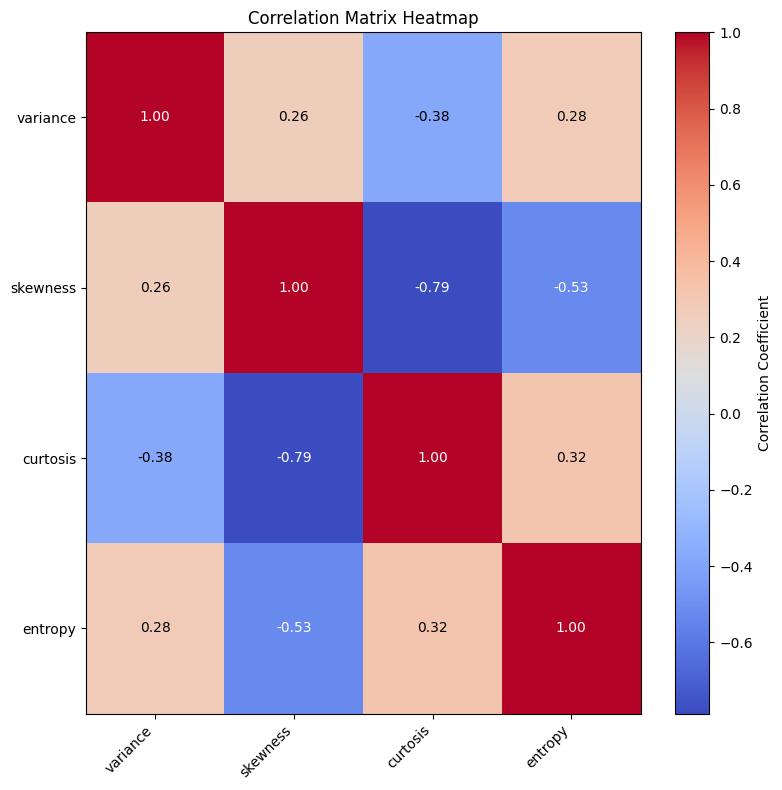

In [13]:
# Compute the correlation matrix

correlation_matrix = np.corrcoef(X_numpy, rowvar=False)


# Display the correlation matrix as a heatmap

# Assuming X_numpy contains the four features: variance, skewness, kurtosis, and entropy
feature_names = ['variance', 'skewness', 'curtosis', 'entropy']

plt.figure(figsize=(8, 8))
plt.title("Correlation Matrix Heatmap")

# Plot the heatmap
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest", aspect='auto')
plt.colorbar(label="Correlation Coefficient")

# Set tick labels for rows and columns
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha="right")
plt.yticks(range(len(feature_names)), feature_names)

# Annotate each cell with the correlation coefficient
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f"{correlation_matrix[i, j]:.2f}",
                 ha="center", va="center", color="black" if abs(correlation_matrix[i, j]) < 0.5 else "white")

plt.tight_layout()
plt.show()


3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [14]:
# Select two features
# Select these features from the original feature set

X_selected = X_numpy[:, [0, 1]]  # Selecting columns for variance and skewness

# Split the selected features into training and validation sets if not done yet
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y_numpy, test_size=0.2, random_state=50)

# Print the shapes to verify
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_selected: (1097, 2)
Shape of X_test_selected: (275, 2)
Shape of y_train: (1097,)
Shape of y_test: (275,)


#### Step 2: Train the Perceptron on Selected Features (10 points)




1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [15]:
## Train the Perceptron model on the training set


#Train the Perceptron model on the training set with selected features
num_iter = 1000
learning_rate = 0.01
weights, misclassified_per_epoch = perceptron(X_train_selected, y_train, num_iter, learning_rate)

#Predict on the training data using the predict function
y_train_pred = predict(X_train_selected, weights)

#  Calculate training accuracy using the accuracy function
accuracy_train = accuracy(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.8304466727438469


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

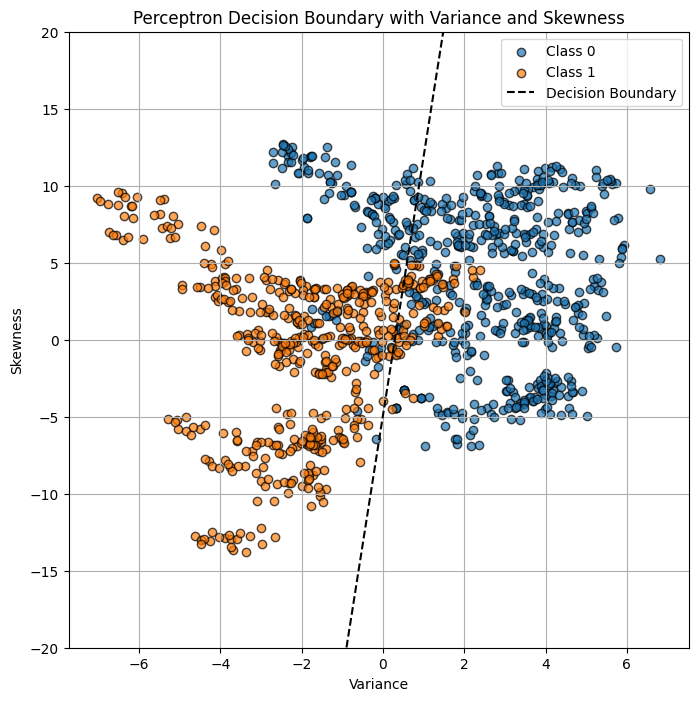

In [16]:
# Function to plot the decision boundary


# Helper function to plot data points for each class
def plot_data_points(X, y):
    """Helper function to plot data points."""
    for class_value in np.unique(y):
        plt.scatter(X[y.flatten() == class_value][:, 0],
                    X[y.flatten() == class_value][:, 1],
                    label=f"Class {int(class_value)}", alpha=0.7,edgecolor='black')

# Function to calculate the decision boundary
def calculate_decision_boundary(X, weights, bias):
    """Calculate the x and y values of the decision boundary."""
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    return x_values, y_values

# Main function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    """Plot the decision boundary of a given model."""
    # model[0] is the bias, model[1:] are the weights for the features
    bias = model[0]                  # Extract bias term
    feature_weights = model[1:]      # Extract feature weights

    # Step 1: Plot the data points for each class
    plt.figure(figsize=(8, 8))
    plot_data_points(X, y)

    # Step 2: Calculate and plot the decision boundary
    x_values, y_values = calculate_decision_boundary(X, feature_weights, bias)
    plt.plot(x_values, y_values, color='black', linestyle='--', label="Decision Boundary")


    # Set a smaller range for the y-axis to zoom in
    plt.ylim(-20, 20)  # Adjust the range as needed
    # Step 3: Add labels and legend
    plt.xlabel("Variance")
    plt.ylabel("Skewness")
    plt.title("Perceptron Decision Boundary with Variance and Skewness")
    plt.legend()
    plt.grid()
    plt.show()

# Plot the decision boundary using the selected features and trained model
model = weights  # Pass weights directly as model
plot_decision_boundary(X_train_selected, y_train, model)

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

Answer1:
From the correlation matrix, we can observe that "Variance" and "Skewness" have a relatively low correlation (0.26) with each other compared to other pairs. This makes them a suitable choice for forming a decision boundary in the Perceptron model, as features with low correlation provide more independent information and help in constructing a clearer boundary. When other feature pairs, such as "Skewness" and "Curtosis," which have a high negative correlation (-0.79), are used, the decision boundary can become less effective. High correlations between features can introduce redundancy, leading to overlapping regions in the decision space and potentially poorer separation of classes. Thus, the decision boundary changes depending on the distinctiveness or redundancy introduced by the chosen feature pairs.

Answer2:
"Variance" and "Skewness" appear to be a good choice due to their low correlation, making them suitable for class separation. Using "Variance" with "Entropy" (correlation 0.28) or "Curtosis" with "Entropy" (correlation 0.32) could also potentially offer good class separation due to their lower correlations. However, using "Skewness" and "Curtosis" together (with a high negative correlation of -0.79) may result in poorer separation due to redundancy in the information they provide, which can lead to a less defined decision boundary. Therefore, selecting feature pairs with low correlation, like "Variance" and "Skewness," typically results in a clearer and more effective boundary for classification tasks.








Shape of X_train_selected: (1097, 2)
Shape of X_test_selected: (275, 2)
Shape of y_train: (1097,)
Shape of y_test: (275,)
Training Accuracy: 0.6554238833181404


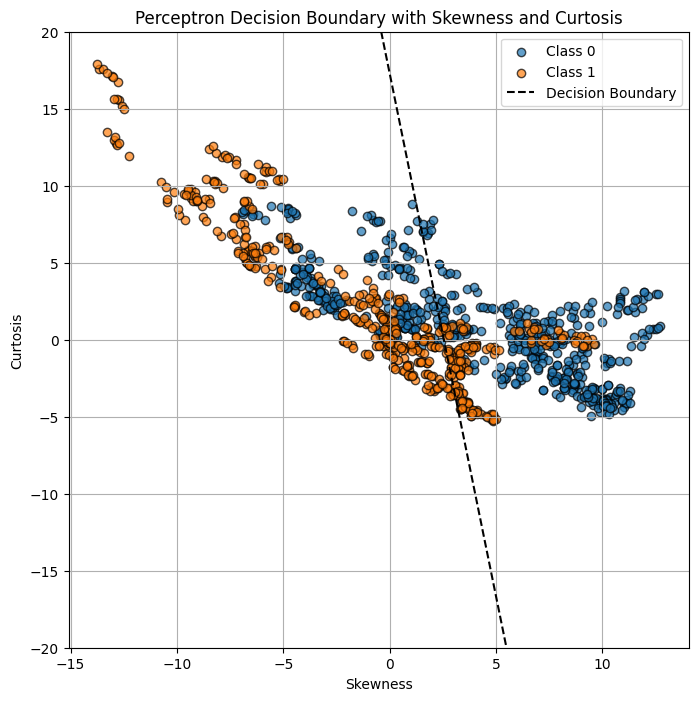

In [17]:
X_selected_dif = X_numpy[:, [1, 2]]  # Selecting columns for skewness and curtosis

# Split the selected features into training and validation sets if not done yet
X_train_selected1, X_test_selected1, y_train1, y_test1 = train_test_split(X_selected_dif, y_numpy, test_size=0.2, random_state=50)

# Print the shapes to verify
print("Shape of X_train_selected:", X_train_selected1.shape)
print("Shape of X_test_selected:", X_test_selected1.shape)
print("Shape of y_train:", y_train1.shape)
print("Shape of y_test:", y_test1.shape)

#Train the Perceptron model on the training set with selected features
num_iter = 1000
learning_rate = 0.01
weights1, misclassified_per_epoch1 = perceptron(X_train_selected1, y_train1, num_iter, learning_rate)

#Predict on the training data using the predict function
y_train_pred1 = predict(X_train_selected1, weights1)

#  Calculate training accuracy using the accuracy function
accuracy_train1 = accuracy(y_train1, y_train_pred1)
print("Training Accuracy:", accuracy_train1)

# Main function to plot the decision boundary
def plot_decision_boundary1(X, y, model):
    """Plot the decision boundary of a given model."""
    # model[0] is the bias, model[1:] are the weights for the features
    bias = model[0]                  # Extract bias term
    feature_weights = model[1:]      # Extract feature weights

    # Step 1: Plot the data points for each class
    plt.figure(figsize=(8, 8))
    plot_data_points(X, y)

    # Step 2: Calculate and plot the decision boundary
    x_values, y_values = calculate_decision_boundary(X, feature_weights, bias)
    plt.plot(x_values, y_values, color='black', linestyle='--', label="Decision Boundary")


    # Set a smaller range for the y-axis to zoom in
    plt.ylim(-20, 20)  # Adjust the range as needed
    # Step 3: Add labels and legend
    plt.xlabel("Skewness")
    plt.ylabel("Curtosis")
    plt.title("Perceptron Decision Boundary with Skewness and Curtosis")
    plt.legend()
    plt.grid()
    plt.show()

model1 = weights1  # Pass weights directly as model
plot_decision_boundary1(X_train_selected1, y_train1, model1)

#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

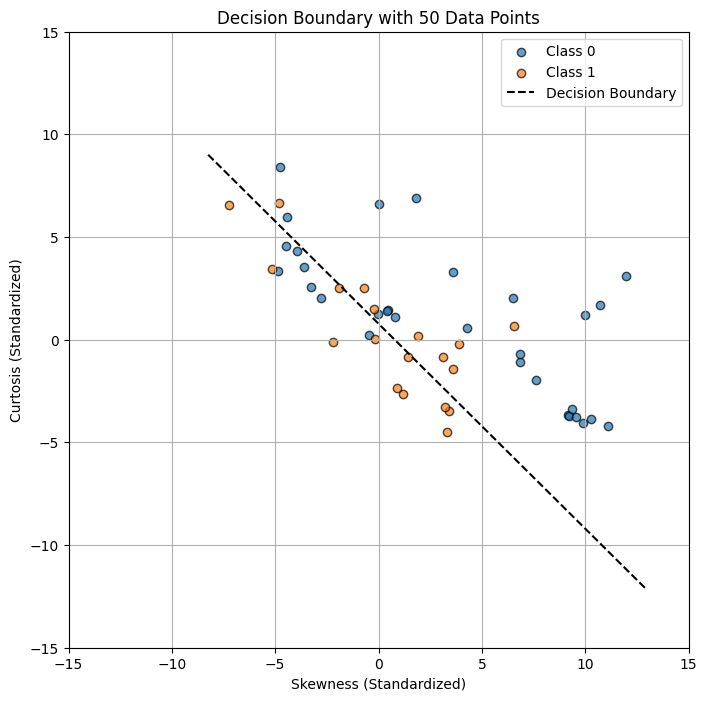

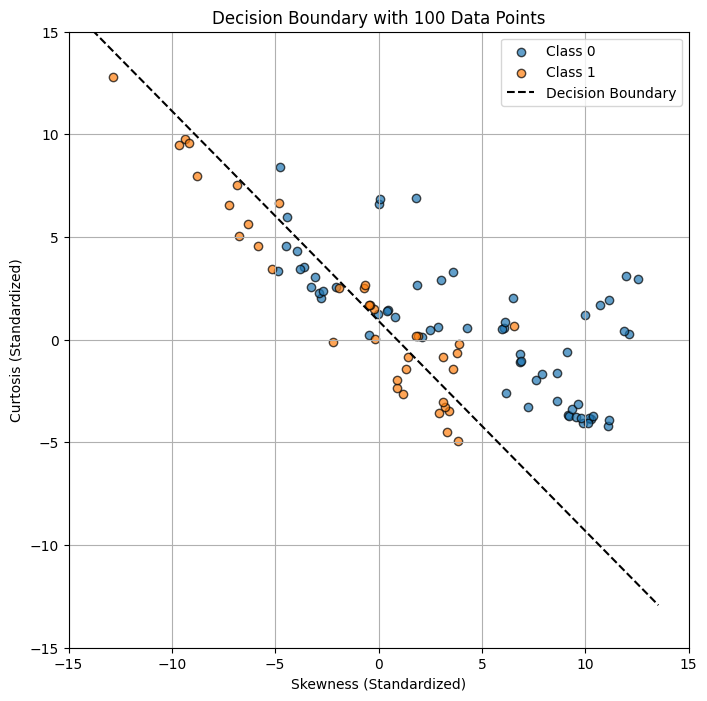

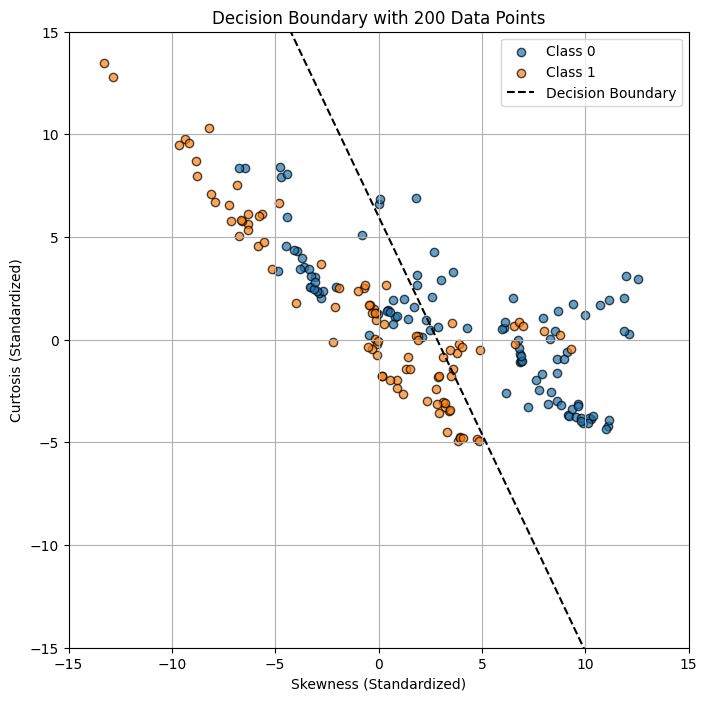

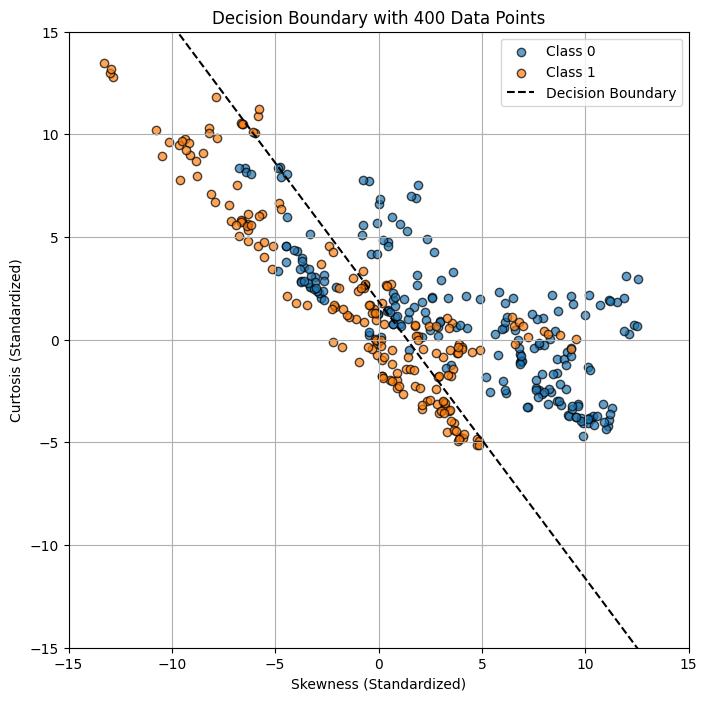

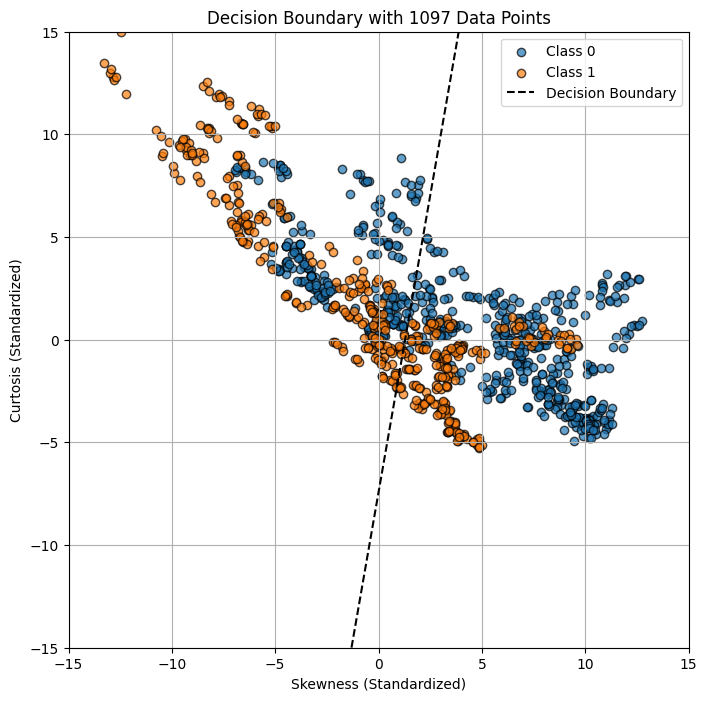

In [18]:
# Train the Perceptron incrementally
def train_perceptron_incrementally(X, y, weights, learning_rate=0.01, epochs=10):
    """Train or update the Perceptron model incrementally with a subset of data."""
    for epoch in range(epochs):
        for i in range(len(X)):
            # Calculate prediction
            prediction = 1 if np.dot(X[i], weights) >= 0 else 0
            # Update weights if there is a misclassification
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
    return weights

# Plot function to visualize decision boundary after each batch
def plot_decision_boundary_incremental(X, y, weights, title="Decision Boundary"):
    plt.figure(figsize=(8, 8))
    # Plot data points
    for class_value in np.unique(y):
        plt.scatter(X[y.flatten() == class_value][:, 0],
                    X[y.flatten() == class_value][:, 1],
                    label=f"Class {int(class_value)}", alpha=0.7, edgecolor='black')

    # Calculate decision boundary
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[1] * x_values + weights[0]) / weights[2]
    plt.plot(x_values, y_values, color="black", linestyle="--", label="Decision Boundary")

    # Formatting
    plt.xlabel("Skewness")
    plt.ylabel("Curtosis")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.ylim(-20, 20)  # Adjust y-axis range to zoom in if needed
    plt.show()

# Initialize weights (include bias term)
initial_weights = np.zeros(X_train_selected1.shape[1] + 1)

# Incrementally add data and update the Perceptron model
# Retrain the Perceptron incrementally on batches of scaled data
batch_sizes = [50, 100, 200, 400, len(X_train_selected1)]
initial_weights = np.zeros(X_train_selected1.shape[1] + 1)  # Initialize weights with bias term

for batch_size in batch_sizes:
    # Select a subset of data incrementally
    X_batch = X_train_selected1[:batch_size]
    y_batch = y_train1[:batch_size]

    # Add bias term to the data
    X_batch_with_bias = np.insert(X_batch, 0, 1, axis=1)

    # Train Perceptron on the current batch
    current_weights = train_perceptron_incrementally(X_batch_with_bias, y_batch, initial_weights)

    # Plot decision boundary
    plt.figure(figsize=(8, 8))
    for class_value in np.unique(y_batch):
        plt.scatter(X_batch[y_batch.flatten() == class_value][:, 0],
                    X_batch[y_batch.flatten() == class_value][:, 1],
                    label=f"Class {int(class_value)}", alpha=0.7, edgecolor='black')

    # Calculate decision boundary
    x_values = np.linspace(X_batch[:, 0].min() - 1, X_batch[:, 0].max() + 1, 100)
    y_values = -(current_weights[1] * x_values + current_weights[0]) / current_weights[2]
    plt.plot(x_values, y_values, 'k--', label="Decision Boundary")

    # Formatting
    plt.xlabel("Skewness (Standardized)")
    plt.ylabel("Curtosis (Standardized)")
    plt.title(f"Decision Boundary with {batch_size} Data Points")
    plt.legend()
    plt.grid(True)
    plt.ylim(-15, 15)  # Adjust y-axis range for better focus
    plt.xlim(-15, 15)  # Adjust x-axis range for better focus
    plt.show()
    print("\n")

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.


   As more data is added in increments, the decision boundary adjusting. Initially, with a small amount of data, the boundary did not be well-positioned. But as more data points are introduced, the boundary started to converge towards a more stable and accurate line that better separates the classes. This process demonstrates the Perceptron's adaptability to new information in incremental learning.
   

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?
2. How does the decision boundary relate to the linearly separable nature of the data?

Answer 1:
The hyperplane changes based on the selected features because each feature set represents different dimensions of the data's variation. For example, combinations of "skewness" and "curtosis" provide specific information on how authentic and fake banknotes differ in terms of image characteristics.
When different feature combinations are selected, the Perceptron algorithm adapts by adjusting the weights (and consequently the orientation and position of the hyperplane) to best separate the two classes in the given feature space. The algorithm minimizes the misclassification by aligning the hyperplane in a way that maximally separates the classes based on the provided features.
Adding more data, especially if it includes points near or across the boundary, may shift the hyperplane, as the Perceptron recalculates the weights to accommodate the new information. This progressive shift in the decision boundary demonstrates the algorithm's adaptive nature, especially in non-linearly separable cases where it attempts to fit as many points as possible correctly.

Answer 2:
A linearly separable dataset is one in which a straight line (or hyperplane in higher dimensions) can fully divide the classes without any misclassification. In such cases, the Perceptron algorithm can achieve a stable decision boundary that accurately separates the classes.
However, when the data is not linearly separable (as may be the case with certain combinations of features in your project), the Perceptron may oscillate or produce a boundary that only approximates the best division. In these cases, the decision boundary might still be reasonably effective but will have some degree of error due to overlapping or outlier points from both classes.
As seen in my decision boundary plots with increasing data points, the line's orientation and position adjust as more samples are added, especially near the boundary, reflecting the Perceptron’s attempt to handle the data's complexity. For linearly separable data, the boundary would stabilize and yield near-perfect separation, while for non-separable data, it attempts the best fit based on the given points.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [19]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""
    # Separate the data into the two classes
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]

    # Step 1: Calculate the mean vectors for each class
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)

    # Step 2: Compute the within-class scatter matrix
    S_W = np.zeros((X.shape[1], X.shape[1]))
    for x in class_0:
        diff = (x - mean_0).reshape(-1, 1)
        S_W += diff @ diff.T
    for x in class_1:
        diff = (x - mean_1).reshape(-1, 1)
        S_W += diff @ diff.T

    # Step 3: Compute the between-class scatter matrix
    mean_diff = (mean_0 - mean_1).reshape(-1, 1)
    S_B = mean_diff @ mean_diff.T

    # Step 4: Find the Fisher LD direction
    # Compute the inverse of S_W and multiply it by S_B
    S_W_inv = np.linalg.inv(S_W)
    fisher_direction = S_W_inv @ mean_diff
    fisher_direction = fisher_direction / np.linalg.norm(fisher_direction)  # Normalize direction

    return fisher_direction

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    return X @ direction

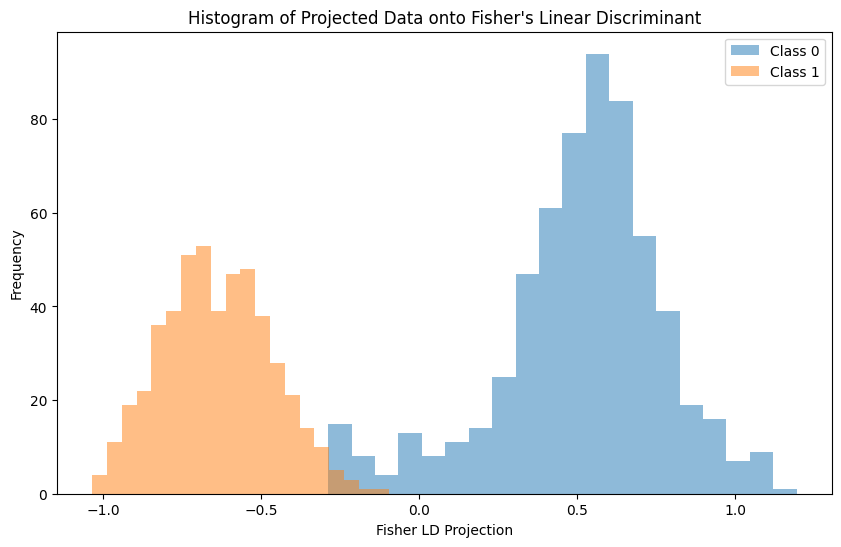

In [20]:


# Step 5: Project data onto the Fisher LD direction
direction = fisher_ld_projection(X_train, y_train)

# Project the data onto the Fisher LD direction
projected_data = project_data(X_train, direction)

# Step 6: Visualize the projected data
plt.figure(figsize=(10, 6))
plt.hist(projected_data [y_train.flatten() == 0], bins=20, alpha=0.5, label="Class 0")
plt.hist(projected_data [y_train.flatten() == 1], bins=20, alpha=0.5, label="Class 1")
plt.xlabel("Fisher LD Projection")
plt.ylabel("Frequency")
plt.title("Histogram of Projected Data onto Fisher's Linear Discriminant")
plt.legend()
plt.show()

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

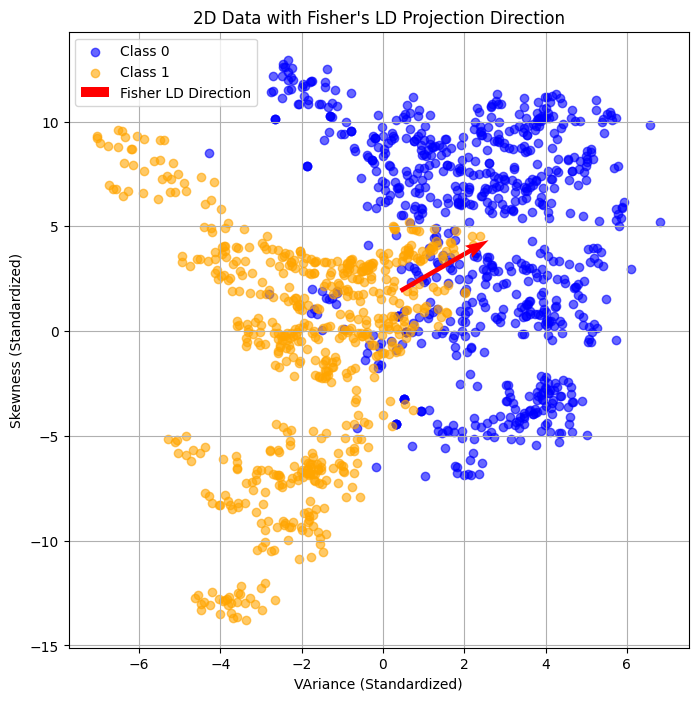

In [21]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly

class_0 = X_selected[y_numpy.flatten() == 0]
class_1 = X_selected[y_numpy.flatten() == 1]

# Calculate the mean of the data as the starting point of the direction vector
mean_point = np.mean(X_selected, axis=0)
scale = 4 # Adjust this to control the length of the direction line

direction_scaled = direction * scale

# Plot the 2D data points with different colors for each class
plt.figure(figsize=(8, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', alpha=0.6, label="Class 0")
plt.scatter(class_1[:, 0], class_1[:, 1], color='orange', alpha=0.6, label="Class 1")

# Plot the projection direction vector using plt.quiver()
plt.quiver(mean_point[0], mean_point[1], direction_scaled[0], direction_scaled[1],
           angles='xy', scale_units='xy', scale=1, color='red', linewidth=2, label="Fisher LD Direction")

# Add labels and title
plt.xlabel("VAriance (Standardized)")
plt.ylabel("Skewness (Standardized)")
plt.title("2D Data with Fisher's LD Projection Direction")
plt.legend()
plt.grid(True)
plt.show()


Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

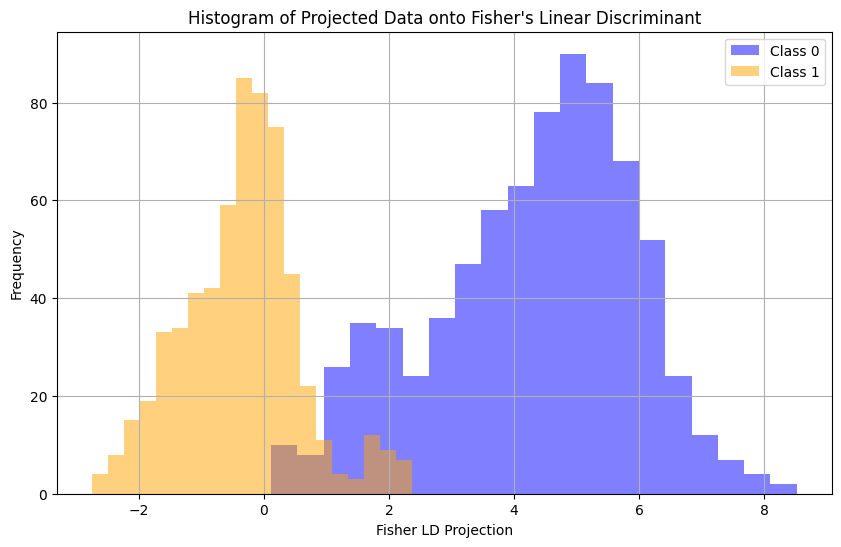

In [22]:
# Plot the histogram of the projected data

projected_data = project_data(X_numpy, direction)

# Step 2: Plot the histogram of the projected data
plt.figure(figsize=(10, 6))
plt.hist(projected_data[y_numpy.flatten() == 0], bins=20, alpha=0.5, label="Class 0", color='blue')
plt.hist(projected_data[y_numpy.flatten() == 1], bins=20, alpha=0.5, label="Class 1", color='orange')

# Add labels and title
plt.xlabel("Fisher LD Projection")
plt.ylabel("Frequency")
plt.title("Histogram of Projected Data onto Fisher's Linear Discriminant")
plt.legend()
plt.grid(True)
plt.show()

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

Answer1:
Fisher's Linear Discriminant did a pretty good job of searching out a direction to project the two classes onto one dimension so that the classes separate quite nicely. Now, if you look at the histogram, each class has a very distinct peak, Class 0 in blue, Class 1 in orange, and that just suggests that Fisher's LD found a way of making the two groups somewhat distinct.

However, there is a significant overlap between the two classes, as can be seen in the middle where the mixture of blue and orange bars forms a brown region. That is, the final data points of Class 0 and Class 1 share similar values in this projected space, and thus are difficult to be distinguished from one another.

In other words, Fisher's LD succeeded in creating some separation between classes but not perfect. That is, some points of each class still overlap into similar positions along this 1D line and that will lead to misclassifications. This overlap indicates that, although Fisher's LD is useful, it seems the dataset may present some level of complexity and, therefore will be difficult to fully separate it with just one linear boundary. Special features or further developed methods may be needed for a more complete separation.

Answer2:
Comparing the original 2D space with the 1D projection from Fisher’s Linear Discriminant (LD) reveals interesting insights about class separation. In the 2D space, the Perceptron attempts to draw a linear boundary between the classes, but due to the overlapping nature of the data, complete separation is challenging. The boundary has flexibility in 2D as it considers both features, yet overlap between the classes persists. When the data is projected into 1D using Fisher’s LD, the goal is to maximize the distance between class means while minimizing within-class variance. This approach results in a clearer separation, as seen in the histogram with distinct peaks for each class. However, some overlap still exists, indicating that while Fisher’s LD optimizes separation along a single direction, it can’t fully separate classes that are inherently mixed. Ultimately, Fisher’s LD provides a more straightforward separation in 1D, while the 2D space offers more detail, though with a less definitive boundary.